 ## <center> CCT College Dublin <center>

 ## <center> Continuous Assessment 2 - Strategic Thinking <center>

 ## <center> Cryptocurrence Historical Prices<center>
    
### <center>TEAM 3: Eduarda Schein, Marilia Silva, Gustavo Martinele, Erica Lima, Lucas Pontes, Muhammad Nauman

## Data Understanding

In [2]:
#Data Dictionary:



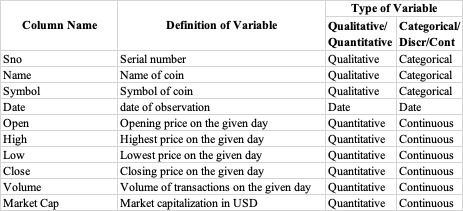

In [3]:
#Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns
import datetime
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
#Preprocessing
from sklearn.model_selection import train_test_split
#Scaling
from sklearn.preprocessing import MinMaxScaler
from matplotlib import scale
# modelling:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
import sklearn.metrics as sm
from sklearn.linear_model import LinearRegression
# Handling warnings
import warnings
warnings.filterwarnings('ignore')
#Table of contents:
from tabulate import tabulate
tabulate.WIDE_CHARS_MODE = False
#T-Test:
from scipy.stats import ttest_rel

# Import statements (standard)
import math
import time
import datetime as dt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

# Import statements (RF)
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [4]:
df_btc = pd.read_csv("coin_Bitcoin.csv")
df_eth = pd.read_csv("coin_Ethereum.csv")
df_usdt = pd.read_csv("coin_Tether.csv")
df_bnb = pd.read_csv("coin_BinanceCoin.csv")
df_usdc = pd.read_csv("coin_USDCoin.csv")
df_sol = pd.read_csv("coin_Solana.csv")
df_xrp = pd.read_csv("coin_XRP.csv")
df_ada = pd.read_csv("coin_Cardano.csv")

In [5]:
df_crypto= pd.concat([df_btc, df_eth,df_usdt, df_bnb, df_usdc, df_sol,df_xrp, df_ada])

In [6]:
df_crypto.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [7]:
df_crypto.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
1369,1370,Cardano,ADA,2021-07-02 23:59:59,1.394397,1.286607,1.332942,1.394397,2.159410e+09,4.454587e+10
1370,1371,Cardano,ADA,2021-07-03 23:59:59,1.441714,1.359664,1.394152,1.406836,2.028094e+09,4.494324e+10
1371,1372,Cardano,ADA,2021-07-04 23:59:59,1.493717,1.382153,1.404008,1.458184,1.806362e+09,4.658364e+10
1372,1373,Cardano,ADA,2021-07-05 23:59:59,1.461221,1.379284,1.461221,1.404898,1.759461e+09,4.488134e+10
1373,1374,Cardano,ADA,2021-07-06 23:59:59,1.456887,1.393282,1.404712,1.418053,1.477700e+09,4.530158e+10


In [8]:
df_crypto.shape

(14632, 10)

In [9]:
df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14632 entries, 0 to 1373
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        14632 non-null  int64  
 1   Name       14632 non-null  object 
 2   Symbol     14632 non-null  object 
 3   Date       14632 non-null  object 
 4   High       14632 non-null  float64
 5   Low        14632 non-null  float64
 6   Open       14632 non-null  float64
 7   Close      14632 non-null  float64
 8   Volume     14632 non-null  float64
 9   Marketcap  14632 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.2+ MB


In [10]:
df_crypto.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,14632.000000,14632.000000,14632.000000,14632.000000,14632.000000,1.463200e+04,1.463200e+04
mean,1112.097936,1473.936220,1385.242782,1431.877953,1434.332398,6.787654e+09,3.552592e+10
std,768.958232,5943.653197,5558.036929,5765.649516,5771.759534,1.817132e+10,1.092216e+11
min,1.000000,0.003082,0.002802,0.002809,0.002810,0.000000e+00,0.000000e+00
25%,458.750000,0.470923,0.438239,0.454068,0.455102,1.911512e+07,7.254668e+08
50%,981.000000,1.024013,1.001554,1.010482,1.010586,2.717045e+08,4.101430e+09
75%,1676.250000,245.776497,235.253754,240.197436,240.326001,3.548535e+09,1.968992e+10
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [11]:
df_crypto.describe(include=object)

,Name,Symbol,Date
count,14632,14632,14632
unique,8,8,2991
top,Bitcoin,BTC,2021-07-06 23:59:59
freq,2991,2991,8


In [12]:
#Creating columns for Month and Year
df_crypto['Month'] = pd.DatetimeIndex(pd.to_datetime(df_crypto['Date'], dayfirst=True)).month
df_crypto['Year'] = pd.DatetimeIndex(pd.to_datetime(df_crypto['Date'], dayfirst=True)).year
df_crypto['Day'] = pd.DatetimeIndex(pd.to_datetime(df_crypto['Date'], dayfirst= True)).day

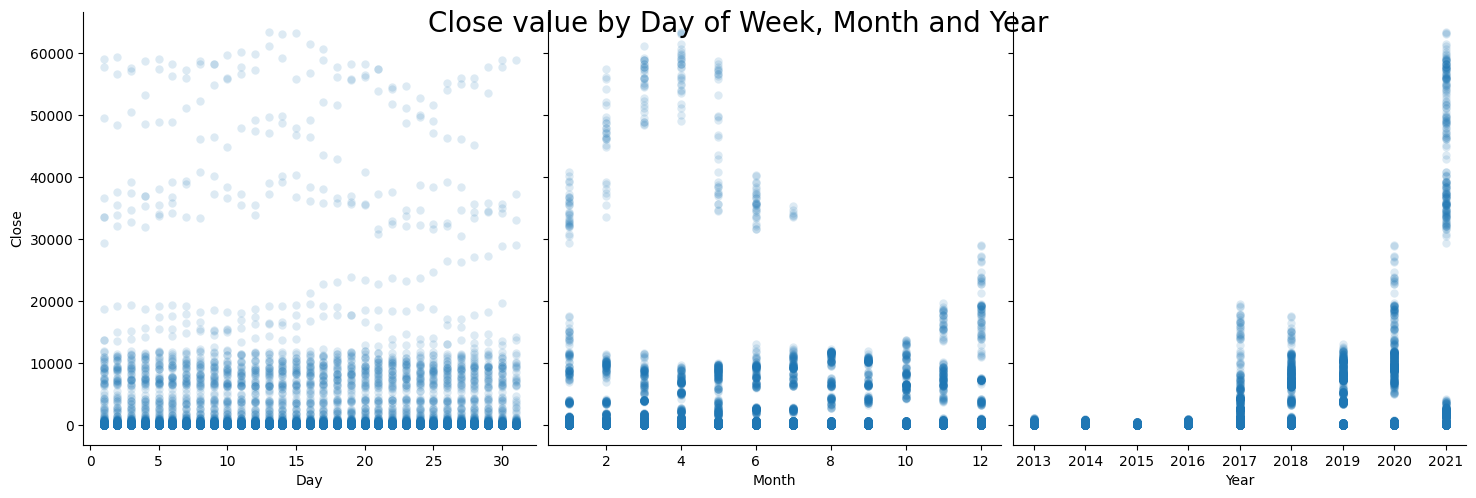

In [13]:
sns.pairplot(df_crypto.dropna(),x_vars=['Day','Month','Year'],y_vars='Close',height=5,plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle('Close value by Day of Week, Month and Year',fontsize=20)
plt.show()

Text(0.5, 1.0, 'Strength of High and Low')

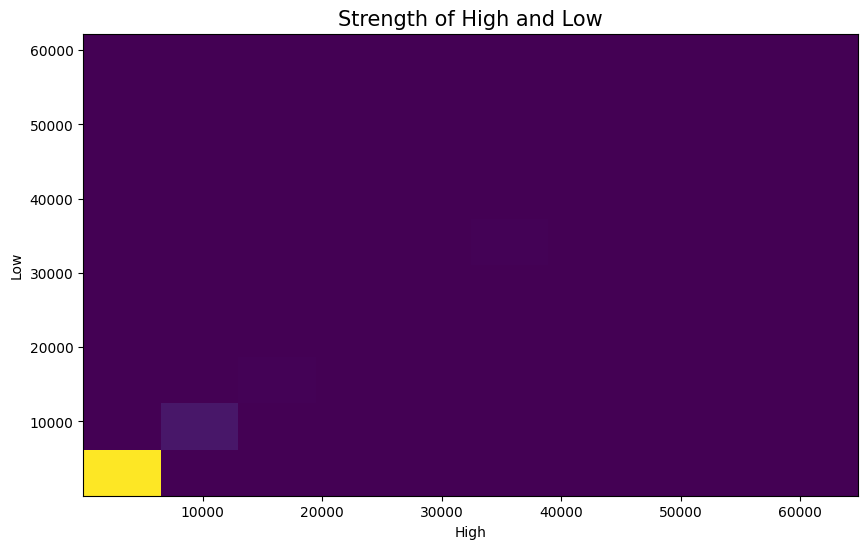

In [14]:
plt.figure(figsize=(10,6))
plt.hist2d(data = df_crypto, x = 'High', y = 'Low')
plt.xlabel('High') 
plt.ylabel('Low') 
plt.title("Strength of High and Low",fontsize = 15)

### ScatterPlots

We plot ScatterPlots to show some linear correlation among variables.

Text(0.5, 1.0, 'Corr between High and Marketcap')

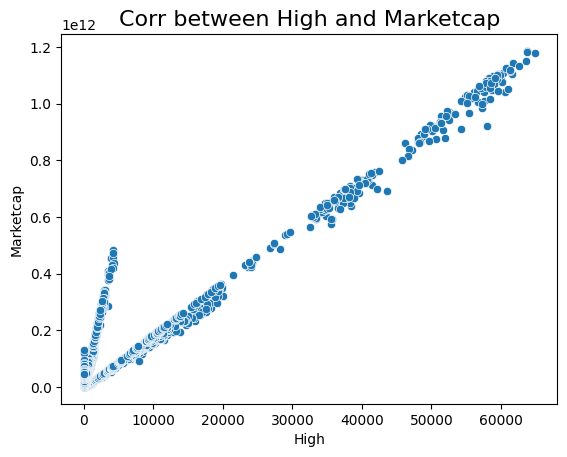

In [15]:
sns.scatterplot(data=df_crypto, x='High', y='Marketcap')
plt.title("Corr between High and Marketcap", fontsize = 16)

Text(0.5, 1.0, 'Corr between High and Close')

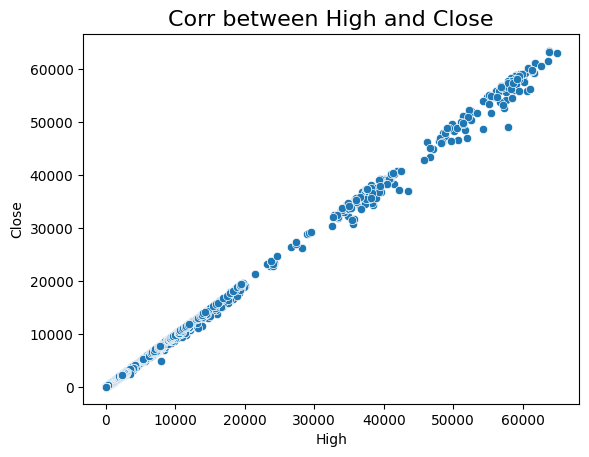

In [16]:
sns.scatterplot(data=df_crypto, x='High', y='Close')
plt.title("Corr between High and Close", fontsize = 16)

<AxesSubplot: xlabel='High', ylabel='Density'>

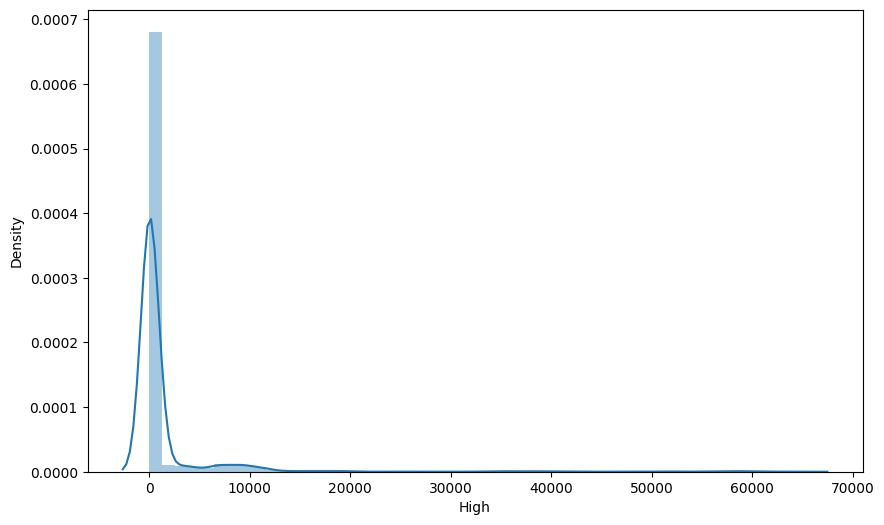

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(df_crypto.High)

<AxesSubplot: xlabel='Low', ylabel='Density'>

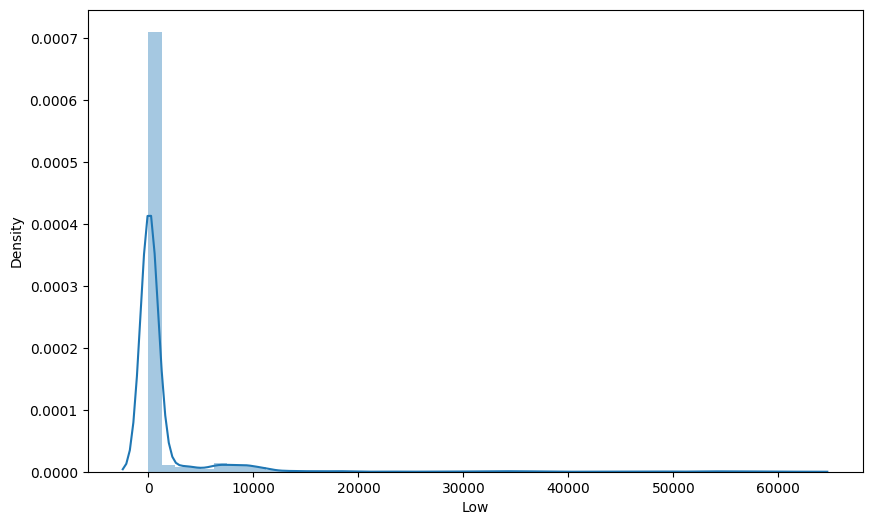

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(df_crypto.Low)

In [19]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(25,10),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=30)
    plt.tight_layout(pad=3.0)
    plt.show()

In [ ]:
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]
triple_plot(df_crypto['Close'],'Distribution of Close price',custom_colors[0])

In [ ]:
#verifying outliers:

exclude = ['SNo', 'Name', 'Symbol', 'Date']
df_crypto.loc[:, df_crypto.columns.difference(exclude)].plot.box(grid=False, fontsize=10, vert=False)

In [ ]:
#creating a new data frame with metric 'CLOSE':
df= pd.DataFrame({'BTC': df_btc['Close'],'ETH': df_eth ['Close'], 'USDT' : df_usdt ['Close'],'BNB': df_bnb ['Close'], 'USDC': df_usdc ['Close'], 'SOL': df_sol ['Close'], 'XRP': df_xrp ['Close'], 'ADA': df_ada ['Close']})

In [ ]:
df.head()

### Measures of variability

In [ ]:
df.describe()

### Daily Returns

In [ ]:
#the average daily return 

DR = df.pct_change(1)

print('The average daily return:')
DR.mean().sort_values(ascending=False)

In [ ]:
#Daily returns ( variance, std)
plt.figure(figsize= (12,4))
for c in DR.columns.values:
    plt.plot(DR.index, DR[c], lw = 2, alpha = .7)

plt.title('Daily Returns')
plt.ylabel('Percentage in decimal form')
plt.xlabel('Days')
plt.legend(DR.columns.values, loc = 'upper right')
plt.show()

### Heat Map Correlation

In [ ]:
corr = df.corr()
plt.figure(figsize=(13,7))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
heat_map = sns.heatmap(corr, mask=mask, annot=True, vmax=1, vmin=-1, fmt='.2f', cmap= 'BrBG')

rotx = heat_map.set_xticklabels(heat_map.get_xticklabels())
roty = heat_map.set_yticklabels(heat_map.get_yticklabels())

In [ ]:
DR.corr()

### Volatility 

In [ ]:
#get the volatility through the std ( square root of the variance)
print('The cryptocurrency volatility')
DR.std().sort_values(ascending=False)

In [ ]:
#Daily Cumulative Return
DCR = (DR+1).cumprod()

In [ ]:
#Daily returns ( variance, std)
plt.figure(figsize= (12.5,4.5))
for c in DCR.columns.values:
    plt.plot(DCR.index, DCR[c], lw = 2, label = c)

plt.title('Daily Cumulative Returns')
plt.ylabel('Growth of 1$ investiment')
plt.xlabel('Days')
plt.legend(DCR.columns.values, loc = 'upper left')
plt.show()

#### Bitcoin

In [ ]:
df_btc.head()

In [ ]:
df_btc.shape

In [ ]:
df_btc.describe()

In [ ]:
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]
triple_plot(df_btc['Close'],'Distribution of Close price',custom_colors[0])

In [ ]:
df_btc.hist(column=['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap'],figsize=(10,10),color="orange",bins=100, grid=False);

#### Ethereum

In [ ]:
df_eth.head()

In [ ]:
df_eth.shape

In [ ]:
df_eth.describe()

#### XRP

In [ ]:
df_xrp.head()

In [ ]:
df_xrp.shape

In [ ]:
df_xrp.describe()

In [ ]:
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]
triple_plot(df_xrp['Close'],'Distribution of Close price',custom_colors[0])

### Treating Data Column

#### Bitcoin:

In [ ]:
#Creating columns for Month and Year
df_btc['Month'] = pd.DatetimeIndex(pd.to_datetime(df_btc['Date'], dayfirst=True)).month
df_btc['Year'] = pd.DatetimeIndex(pd.to_datetime(df_btc['Date'], dayfirst=True)).year
df_btc['Day'] = pd.DatetimeIndex(pd.to_datetime(df_btc['Date'], dayfirst= True)).day

#Checking all the changes so far
df_btc.head()

In [ ]:
df_btc.set_index('SNo')

In [ ]:
df_sol.set_index('SNo')

#### Ethereum:

In [ ]:
#Creating columns for Month and Year
df_eth['Month'] = pd.DatetimeIndex(pd.to_datetime(df_eth['Date'], dayfirst=True)).month
df_eth['Year'] = pd.DatetimeIndex(pd.to_datetime(df_eth['Date'], dayfirst=True)).year
df_eth['Day'] = pd.DatetimeIndex(pd.to_datetime(df_eth['Date'], dayfirst= True)).day

#Checking all the changes so far
df_eth.head()

In [ ]:
df_eth.set_index('SNo')

#### XRP:

In [ ]:
#Creating columns for Month and Year
df_xrp['Month'] = pd.DatetimeIndex(pd.to_datetime(df_xrp['Date'], dayfirst=True)).month
df_xrp['Year'] = pd.DatetimeIndex(pd.to_datetime(df_xrp['Date'], dayfirst=True)).year
df_xrp['Day'] = pd.DatetimeIndex(pd.to_datetime(df_xrp['Date'], dayfirst= True)).day

#Checking all the changes so far
df_xrp.head()

In [ ]:
df_xrp.set_index('SNo')

#### ADA:

In [ ]:
#Creating columns for Month and Year
df_ada['Month'] = pd.DatetimeIndex(pd.to_datetime(df_ada['Date'], dayfirst=True)).month
df_ada['Year'] = pd.DatetimeIndex(pd.to_datetime(df_ada['Date'], dayfirst=True)).year
df_ada['Day'] = pd.DatetimeIndex(pd.to_datetime(df_ada['Date'], dayfirst= True)).day

#Checking all the changes so far
df_ada.head()

In [ ]:
df_ada.set_index('SNo')

#Label Encoder used to avoid sparse data:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df_crypto['Symbol'])

df_crypto['Symbol_Encoded'] = le.transform(df_crypto['Symbol'])
df_crypto.head()

In [ ]:
df_btc1 = df_btc.drop(columns = ['Symbol', 'Name'])
df_sol1 = df_sol.drop(columns = ['Symbol', 'Name'])
df_eth1 = df_eth.drop(columns = ['Symbol', 'Name'])
df_xrp1 = df_xrp.drop(columns = ['Symbol', 'Name'])
df_ada1 = df_ada.drop(columns = ['Symbol', 'Name'])

### Outliers

In [ ]:
df_btc1.plot.box(grid=False, fontsize=12, vert=False)
plt.title("Outliers Bitcoin", fontsize = 12)

In [ ]:
df_sol1.plot.box(grid=False, fontsize=12, vert=False)
plt.title("Outliers Solano", fontsize = 12)

In [ ]:
df_eth1.plot.box(grid=False, fontsize=12, vert=False)
plt.title("Outliers Ethereum", fontsize = 12)

In [ ]:
df_xrp1.plot.box(grid=False, fontsize=12, vert=False)
plt.title("Outliers XRP", fontsize = 12)

In [ ]:
df_ada1.plot.box(grid=False, fontsize=12, vert=False)
plt.title("Outliers ADA", fontsize = 12)

## Modeling

## BITCOIN

In [ ]:
projection_Bitcoin = 5
#creation of a new column with a name prediction
df_btc1['Prediction'] = df_btc1[['Close']].shift(-projection_Bitcoin)
df_btc1

In [ ]:
# Defining X and y

X_Bitcoin = np.array(df_btc1[['Close']])
X_Bitcoin = X_Bitcoin[:-projection_Bitcoin]

y_Bitcoin = df_btc1['Prediction'].values
y_Bitcoin = y_Bitcoin[:-projection_Bitcoin]

In [ ]:
import pylab as p
import matplotlib.pyplot as plt
from collections import Counter
import re

#importing packages for the predictions of time-series data

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

In [ ]:
# Defining X and y

X_Bitcoin = np.array(df_btc1[['Close']])
X_Bitcoin = X_Bitcoin[:-projection_Bitcoin]

y_Bitcoin = df_btc1['Prediction'].values
y_Bitcoin = y_Bitcoin[:-projection_Bitcoin]

In [ ]:
X_Bitcoin.dtype

## TIME SERIES - BITCOIN

## Bitcoin Close Price Prediction by ARIMA

In [ ]:
#Waseem Start

In [ ]:
# Unix-time to 
df_btc1.Timestamp = pd.to_datetime(df_btc1.Date)

# Resampling to daily frequency
df_btc1.index = df_btc1.Timestamp
df_daily = df_btc1.resample('D').mean()

# Resampling to monthly frequency
df_month = df_btc1.resample('M').mean()
# Resampling to annual frequency
df_year = df_btc1.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df_btc1.resample('Q-DEC').mean()

In [ ]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges', fontsize=22)

plt.subplot(221)
plt.plot(df_daily.Close, '-', label='By Days')
plt.legend()


plt.subplot(222)
plt.plot(df_month.Close, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Close, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Close, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats
import statsmodels.api as sm
df_month['Close_Price_box'], lmbda = stats.boxcox(df_month.Close)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Close)[1])

In [ ]:
from itertools import product
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Close, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [ ]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

In [ ]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

In [ ]:
data = df_btc['Close']
Date1 = df_btc['Date']
bc_train1 = df_btc[['Date','Close']]
# Setting the Date as Index
bc_train2 = bc_train1.set_index('Date')
bc_train2.sort_index(inplace=True)
print (type(bc_train2))
print (bc_train2.head())
plt.plot(bc_train2)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of bitcoin", fontsize=15)
plt.show()

In [ ]:
# Spliting the data set into train and test set

x_train_Bitcoin, x_test_Bitcoin, y_train_Bitcoin, y_test_Bitcoin = train_test_split(X_Bitcoin,y_Bitcoin,test_size=0.15)

In [ ]:
from itertools import cycle
import plotly.express as px
visualize_Bitcoin = cycle(['Open','Close','High','Low','Prediction'])

fig = px.line(df_btc1, x=df_btc1.Date, y=[df_btc1['Open'], df_btc1['Close'], 
                                          df_btc1['High'], df_btc1['Low'],df_btc1['Prediction']],
             labels={'Date': 'Date','value':'Price'})
fig.update_layout(title_text='Bitcoin', font_size=15, font_color='black',legend_title_text='Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(visualize_Bitcoin)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


In [ ]:
x_projection_Bitcoin = np.array(df_btc1[['Close']])[-projection_Bitcoin:]
print(x_projection_Bitcoin)

In [ ]:
#checking stationary BITCOIN: 
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
        if result[0]>value:
            print("The graph is non stationery")
            break
        else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = df_btc['Close']      
test_stationarity(ts)

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

temp_Y = df_btc['Close']
res = sm.tsa.seasonal_decompose(temp_Y,period=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

## Bitcoin Close Price Prediction by Random Forest

In [ ]:
df_btc1 = df_btc.drop(['SNo','Name','Symbol','Date'], axis=1)

In [ ]:
df_btc1.index.name = 'Date'
df_btc1.index = pd.to_datetime(df_btc1.index)
#df_btc = df_btc[:-1].astype(float) # drop last row (missing closing prices)

In [ ]:
# Prepare training/test DataFrames. 
train_end = pd.to_datetime(datetime(2021, 7, 2))
test_start = pd.to_datetime(datetime(2021, 6, 5))
target = 'Close'

train_df = df_btc1.loc[:train_end]
test_df = df_btc1.loc[train_end:] 

features = df_btc1.drop(target, axis=1).values
#X_test = df_btc1.copy().drop(target, axis=1).values
class_target = df_btc1[target].values
#y_test = df_btc1[target].values

In [ ]:
x_train_Bitcoin, x_test_Bitcoin, y_train_Bitcoin, y_test_Bitcoin = train_test_split(features,class_target,test_size=0.15)

In [ ]:
# Perform grid search for hyperparameters. 
def Grid_Search_CV_RFR(X_train, y_train):
    reg = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [5,10,50],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_leaf" : [1,3,5]
            }

    tss_splits = TimeSeriesSplit(n_splits=10).split(X_train)
    grid = GridSearchCV(reg, param_grid, cv=tss_splits, verbose=0)
    #grid = GridSearchCV(reg, param_grid, cv=3, verbose=0)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

best_score, best_params = Grid_Search_CV_RFR(x_train_Bitcoin, y_train_Bitcoin)

In [ ]:
mf = best_params['max_features']
msl = best_params['min_samples_leaf']
ne = best_params['n_estimators']

In [ ]:
mf

In [ ]:
msl

In [ ]:
ne

In [ ]:
# Fit RFR with best parameters from grid search.
rfr = RandomForestRegressor(n_estimators=ne, max_features=mf, min_samples_leaf=msl, random_state=10)
rfr.fit(x_train_Bitcoin, y_train_Bitcoin)

In [ ]:
# Examine feature importances.
#features = train_df.copy().drop(target, axis=1).columns
importances = rfr.feature_importances_
indices = np.argsort(importances)

trace = go.Bar(
    x=features[indices],
    y=importances[indices],
    marker = dict(color='green')
)

data=[trace]

# Edit the layout, then plot!
layout = dict(title = 'Feature Importance (Random Forest)',
              yaxis = dict(title = 'Relative Importance'),
              xaxis = dict(autorange='reversed',
                           tickfont=dict(size=10))
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename='importance')

In [ ]:
# Get predictions for train/test sets.
train_pred = rfr.predict(x_train_Bitcoin)
test_pred = rfr.predict(x_test_Bitcoin)

In [ ]:
mse1 = mean_squared_error(y_test_Bitcoin, test_pred)
rmse1 = mse1**.5
print("Square root error: mse = %f" % mse1)
print("root mean squared error: rmse = %f" % rmse1)

In [ ]:
# Calculate the absolute errors
errors_bit = abs(test_pred - y_test_Bitcoin)

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape1 = 100 * (errors_bit / y_test_Bitcoin)
# Calculate and display accuracy
accuracy1 = 100 - np.mean(mape1)
print('RF EXP Model Accuracy:', round(accuracy1, 2), '%.')

In [ ]:
# Create traces.
def create_trace(df, color, label):
    dates = df.index 
    prices = df[df.columns[0]].values

    trace = go.Scatter(
        x = dates,
        y = prices,
        name = label,
        line = dict(color=color)
    )
    return trace

train_act_df = pd.DataFrame(y_train_Bitcoin)
train_act_df.columns = ['act_close']
train_pred_df = pd.DataFrame(train_pred)
train_pred_df.columns = ['pred_close']

pred_trace = create_trace(train_pred_df, 'red', 'Predicted')
act_trace = create_trace(train_act_df, 'blue', 'Actual')
data = [pred_trace, act_trace]

In [ ]:
# Edit the layout, then plot!
layout = dict(title = 'Ethereum Closing Price (Training)',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Closing Price'),
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename='training-prices')

In [ ]:
test_act_df = pd.DataFrame(y_test_Bitcoin)
test_act_df.columns = ['act_close']
test_pred_df = pd.DataFrame(test_pred)
test_pred_df.columns = ['pred_close']

pred_trace = create_trace(test_pred_df, 'red', 'Predicted')
act_trace = create_trace(test_act_df, 'blue', 'Actual')
data = [pred_trace, act_trace]

In [ ]:
# Edit the layout, then plot!
layout = dict(title = 'Bitcoin Closing Price (Test)',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Closing Price'),
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename='test-prices')

### End RF

## XRP

In [ ]:
# Unix-time to 
df_xrp1.Timestamp = pd.to_datetime(df_xrp1.Date)

# Resampling to daily frequency
df_xrp1.index = df_xrp1.Timestamp
df_daily = df_xrp1.resample('D').mean()

# Resampling to monthly frequency
df_month = df_xrp1.resample('M').mean()
# Resampling to annual frequency
df_year = df_xrp1.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df_xrp1.resample('Q-DEC').mean()

In [ ]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('XRP exchanges', fontsize=22)

plt.subplot(221)
plt.plot(df_daily.Close, '-', label='By Days')
plt.legend()


plt.subplot(222)
plt.plot(df_month.Close, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Close, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Close, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats
import statsmodels.api as sm
df_month['Close_Price_box'], lmbda = stats.boxcox(df_month.Close)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Close)[1])

In [ ]:
from itertools import product
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Close, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [ ]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

In [ ]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

In [ ]:
projection_xrp = 5
#creation of a new column with a name prediction
df_xrp1['Prediction'] = df_xrp1[['Close']].shift(-projection_xrp)
df_xrp1.tail(7)

In [ ]:
visualize_xrp = cycle(['Open','Close','High','Low','Prediction'])

fig = px.line(df_xrp1, x=df_xrp1.Date, y=[df_xrp1['Open'], df_xrp1['Close'], 
                                          df_xrp1['High'], df_xrp1['Low'],df_xrp1['Prediction']],
             labels={'Date': 'Date','value':'Price'})
fig.update_layout(title_text='XRP', font_size=15, font_color='black',legend_title_text='Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(visualize_xrp)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
# Defining X and y

X_xrp = np.array(df_xrp1[['Close']])
X_xrp = X_xrp[:-projection_xrp]

y_xrp = df_xrp1['Prediction'].values
y_xrp = y_xrp[:-projection_xrp]

In [ ]:
#Spliting into train and test set

x_train_xrp, x_test_xrp, y_train_xrp, y_test_xrp = train_test_split(X_xrp,y_xrp,test_size=0.15)

In [ ]:
data = df_xrp['Close']
Date1 = df_xrp['Date']
xrp_train1 = df_xrp[['Date','Close']]
# Setting the Date as Index
xrp_train2 = xrp_train1.set_index('Date')
xrp_train2.sort_index(inplace=True)
print (type(xrp_train2))
print (xrp_train2.head())
plt.plot(xrp_train2)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of XRP", fontsize=15)
plt.show()

In [ ]:
#Checking if the data is stationary:

#XRP:

from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
        if result[0]>value:
            print("The graph is non stationery")
            break
        else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = xrp_train2['Close']      
test_stationarity(ts)

In [ ]:
temp_Y = df_xrp['Close']
res = sm.tsa.seasonal_decompose(temp_Y,period=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

## XRP RF Algorithm

In [ ]:
df_xrp1.index.name = 'Date'
df_xrp1.index = pd.to_datetime(df_xrp1.index)
#df_btc = df_btc[:-1].astype(float) # drop last row (missing closing prices)

In [ ]:
#df_xrp1 = df_xrp1.drop(['SNo','Date','Prediction'], axis=1)
df_xrp1

In [ ]:
# Prepare training/test DataFrames. 
#train_end = pd.to_datetime(datetime(2021, 7, 2))
#test_start = pd.to_datetime(datetime(2021, 6, 5))
target = 'Close'

train_df = df_xrp1.loc[:train_end]
#test_df = df_btc1.loc[train_end:] 

features_xrp = df_xrp1.drop(target, axis=1).values
#X_test = df_btc1.copy().drop(target, axis=1).values
class_target_xrp = df_xrp1[target].values
#y_test = df_btc1[target].values

In [ ]:
x_train_xrp, x_test_xrp, y_train_xrp, y_test_xrp = train_test_split(features_xrp,class_target_xrp,test_size=0.15)

In [ ]:
# Perform grid search for hyperparameters. 
def Grid_Search_CV_RFR(X_train, y_train):
    reg = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [5,10,50],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_leaf" : [1,3,5]
            }

    tss_splits = TimeSeriesSplit(n_splits=10).split(X_train)
    grid = GridSearchCV(reg, param_grid, cv=tss_splits, verbose=0)
    #grid = GridSearchCV(reg, param_grid, cv=3, verbose=0)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

best_score, best_params = Grid_Search_CV_RFR(x_train_xrp, y_train_xrp)

In [ ]:
mf = best_params['max_features']
msl = best_params['min_samples_leaf']
ne = best_params['n_estimators']

In [ ]:
mf

In [ ]:
msl

In [ ]:
ne

In [ ]:
# Fit RFR with best parameters from grid search.
rfr = RandomForestRegressor(n_estimators=ne, max_features=mf, min_samples_leaf=msl, random_state=42)
rfr.fit(x_train_xrp, y_train_xrp)

In [ ]:
# Examine feature importances.
#features = train_df.copy().drop(target, axis=1).columns
features_xrp = df_xrp1.drop(target, axis=1).columns
importances = rfr.feature_importances_
indices = np.argsort(importances)

trace = go.Bar(
    x=features_xrp[indices],
    y=importances[indices],
    marker = dict(color='green')
)

data=[trace]

# Edit the layout, then plot!
layout = dict(title = 'Feature Importance (Random Forest)',
              yaxis = dict(title = 'Relative Importance'),
              xaxis = dict(autorange='reversed',
                           tickfont=dict(size=10))
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename='importance')

In [ ]:
# Get predictions for train/test sets.
train_pred1 = rfr.predict(x_train_xrp)
test_pred1 = rfr.predict(x_test_xrp)

In [ ]:
mse = mean_squared_error(y_test_xrp, test_pred1)
rmse = mse**.5
print("Square root error: mse = %f" % mse)
print("root mean squared error: rmse = %f" % rmse)

In [ ]:
# Calculate the absolute errors
errors = abs(test_pred1 - y_test_xrp)

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test_xrp)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('RF EXP Model Accuracy:', round(accuracy, 2), '%.')

In [ ]:
# Create traces.
def create_trace(df, color, label):
    dates = df.index 
    prices = df[df.columns[0]].values

    trace = go.Scatter(
        x = dates,
        y = prices,
        name = label,
        line = dict(color=color)
    )
    return trace

train_act_df = pd.DataFrame(y_train_xrp)
train_act_df.columns = ['act_close']
train_pred_df = pd.DataFrame(train_pred1)
train_pred_df.columns = ['pred_close']

pred_trace = create_trace(train_pred_df, 'red', 'Predicted')
act_trace = create_trace(train_act_df, 'blue', 'Actual')
data = [pred_trace, act_trace]

In [ ]:
# Edit the layout, then plot!
layout = dict(title = 'XRP Closing Price (Training)',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Closing Price'),
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename='training-prices')

In [ ]:
test_act_df = pd.DataFrame(y_test_xrp)
test_act_df.columns = ['act_close']
test_pred_df = pd.DataFrame(test_pred1)
test_pred_df.columns = ['pred_close']

pred_trace = create_trace(test_pred_df, 'red', 'Predicted')
act_trace = create_trace(test_act_df, 'blue', 'Actual')
data = [pred_trace, act_trace]

In [ ]:
# Edit the layout, then plot!
layout = dict(title = 'Bitcoin Closing Price (Test)',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Closing Price'),
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename='test-prices')